# Joining Data with pandas

### Datasets

In [238]:
import pandas as pd
import matplotlib.pyplot as plt
taxi_owners = pd.read_pickle('datasets/taxi_owners.p')
taxi_veh = pd.read_pickle('datasets/taxi_veh.p')
wards = pd.read_pickle('datasets/ward.p')
census = pd.read_pickle('datasets/census.p')
licenses = pd.read_pickle('datasets/licenses.p')
biz_owners = pd.read_pickle('datasets/biz_owners.p')
ridership = pd.read_pickle('datasets/cta_ridership.p')
cal = pd.read_pickle('datasets/cta_calendar.p')
stations = pd.read_pickle('datasets/stations.p')
zip_demo = pd.read_pickle('datasets/zip_demo.p')
land_use = pd.read_pickle('datasets/land_use.p')
movies = pd.read_pickle('datasets/movies.p')
financials = pd.read_pickle('datasets/financials.p')
financials = financials.set_index('id')
taglines = pd.read_pickle('datasets/taglines.p')
movie_to_genres = pd.read_pickle('datasets/movie_to_genres.p')
crews = pd.read_pickle('datasets/crews.p')
ratings = pd.read_pickle('datasets/ratings.p')
sequels = pd.read_pickle('datasets/sequels.p')
sequels = sequels.set_index('id')
actors_movies = pd.read_csv('datasets/actors_movies.csv')
casts = pd.read_pickle('datasets/casts.p')
sp500 = pd.read_csv('datasets/S&P500.csv')
worldbank_gdp = pd.read_csv('datasets/WorldBank_GDP.csv')
worldbank_pop = pd.read_csv('datasets/WorldBank_POP.csv')

## 1. Data Merging Basics

### Your first inner join
Instructions:
<ul>
<li>Merge taxi_owners with taxi_veh on the column vid, and save the result to taxi_own_veh.</li>
<li>Set the left and right table suffixes for overlapping columns of the merge to _own and _veh, respectively.</li>
<li>Select the fuel_type column from taxi_own_veh and print the value_counts() to find the most popular fuel_types used.</li>
</ul>

In [178]:
# Merge the taxi_owners and taxi_veh tables
taxi_own_veh = taxi_owners.merge(taxi_veh, on='vid')

# Print the column names of the taxi_own_veh
print(taxi_own_veh.columns)

# Merge the taxi_owners and taxi_veh tables setting a suffix
taxi_own_veh = taxi_owners.merge(taxi_veh, on='vid', suffixes=['_own', '_veh'])

# Print the column names of taxi_own_veh
print(taxi_own_veh.columns)

# Print the value_counts to find the most popular fuel_type
print(taxi_own_veh['fuel_type'].value_counts())

Index(['rid', 'vid', 'owner_x', 'address', 'zip', 'make', 'model', 'year',
       'fuel_type', 'owner_y'],
      dtype='object')
Index(['rid', 'vid', 'owner_own', 'address', 'zip', 'make', 'model', 'year',
       'fuel_type', 'owner_veh'],
      dtype='object')
HYBRID                    2792
GASOLINE                   611
FLEX FUEL                   89
COMPRESSED NATURAL GAS      27
Name: fuel_type, dtype: int64


### Inner joins and number of rows returned
Instructions:
<ul>
<li>Merge wards and census on the ward column and save the result to wards_census.</li>
<li>Merge the wards_altered and census tables on the ward column, and notice the difference in returned rows.</li>
<li>Merge the wards and census_altered tables on the ward column, and notice the difference in returned rows.</li>
</ul>

In [192]:
wards_altered = wards
wards_altered['ward'] = wards_altered['ward'].replace(['1'], '61')
census_altered = census
census_altered['ward'] = census_altered['ward'].replace(['1'], None)

# Merge the wards and census tables on the ward column
wards_census = wards.merge(census, on='ward')

# Print the shape of wards_census
print('wards_census table shape:', wards_census.shape)

# Print the first few rows of the wards_altered table to view the change 
print(wards_altered[['ward']].head())

# Merge the wards_altered and census tables on the ward column
wards_altered_census = wards_altered.merge(census, on='ward')

# Print the shape of wards_altered_census
print('wards_altered_census table shape:', wards_altered_census.shape)

# Print the first few rows of the census_altered table to view the change 
print(census_altered[['ward']].head())

# Merge the wards and census_altered tables on the ward column
wards_census_altered = wards.merge(census_altered, on='ward')

# Print the shape of wards_census_altered
print('wards_census_altered table shape:', wards_census_altered.shape)

wards_census table shape: (49, 9)
  ward
0   61
1    2
2    3
3    4
4    5
wards_altered_census table shape: (49, 9)
   ward
0  None
1     2
2     3
3     4
4     5
wards_census_altered table shape: (49, 9)


### One-to-many merge
Instructions:
<ul>
<li>Starting with the licenses table on the left, merge it to the biz_owners table on the column account, and save the results to a variable named licenses_owners.</li>
<li>Group licenses_owners by title and count the number of accounts for each title. Save the result as counted_df</li>
<li>Sort counted_df by the number of accounts in descending order, and save this as a variable named sorted_df.</li>
<li>Use the .head() method to print the first few rows of the sorted_df.</li>
</ul>

In [181]:
# Merge the licenses and biz_owners table on account
licenses_owners = licenses.merge(biz_owners, on='account')

# Group the results by title then count the number of accounts
counted_df = licenses_owners.groupby('title').agg({'account':'count'})

# Sort the counted_df in desending order
sorted_df = counted_df.sort_values(by='account', ascending=False)

# Use .head() method to print the first few rows of sorted_df
sorted_df.head()

,account
title,
PRESIDENT,6259
SECRETARY,5205
SOLE PROPRIETOR,1658
OTHER,1200
VICE PRESIDENT,970


### Total riders in a month
Instructions:
<ul>
<li>Merge the ridership and cal tables together, starting with the ridership table on the left and save the result to the variable ridership_cal. If you code takes too long to run, your merge conditions might be incorrect.</li>
<li>Extend the previous merge to three tables by also merging the stations table.</li>
<li>Create a variable called filter_criteria to select the appropriate rows from the merged table so that you can sum the rides column.</li>
</ul>

In [183]:
# Merge the ridership and cal tables
ridership_cal = ridership.merge(cal, on=['year','month','day'])

# Merge the ridership, cal, and stations tables
ridership_cal_stations = ridership.merge(cal, on=['year','month','day']) \
							.merge(stations, on='station_id')

# Create a filter to filter ridership_cal_stations
filter_criteria = ((ridership_cal_stations['month'] == 7) 
                   & (ridership_cal_stations['day_type'] == 'Weekday') 
                   & (ridership_cal_stations['station_name'] == 'Wilson'))

# Use .loc and the filter to select for rides
ridership_cal_stations.loc[filter_criteria, 'rides'].sum()

140005

### Three table merge
Instructions:
<ul>
<li>Starting with the licenses table, merge to it the zip_demo table on the zip column. Then merge the resulting table to the wards table on the ward column. Save result of the three merged tables to a variable named licenses_zip_ward.</li>
<li>Group the results of the three merged tables by the column alderman and find the median income.</li>
</ul>

In [184]:
# Merge licenses and zip_demo, on zip; and merge the wards on ward
licenses_zip_ward = licenses.merge(zip_demo, on='zip') \
            			.merge(wards, on='ward')

# Print the results by alderman and show median income
licenses_zip_ward.groupby('alderman').agg({'income':'median'})

,income
alderman,
Ameya Pawar,66246.0
Anthony A. Beale,38206.0
Anthony V. Napolitano,82226.0
Ariel E. Reyboras,41307.0
Brendan Reilly,110215.0
Brian Hopkins,87143.0
Carlos Ramirez-Rosa,66246.0
Carrie M. Austin,38206.0
Chris Taliaferro,55566.0


### One-to-many merge with multiple tables
Instructions:
<ul>
<li>Merge land_use and census on the ward column. Merge the result of this with licenses on the ward column, using the suffix _cen for the left table and _lic for the right table. Save this to the variable land_cen_lic.</li>
<li>Group land_cen_lic by ward, pop_2010 (the population in 2010), and vacant, then count the number of accounts. Save the results to pop_vac_lic.</li>
<li>Sort pop_vac_lic by vacant, account, andpop_2010 in descending, ascending, and ascending order respectively. Save it as sorted_pop_vac_lic.</li>
</ul>

In [185]:
# Merge land_use and census and merge result with licenses including suffixes
land_cen_lic = land_use.merge(census, on='ward') \
                    .merge(licenses, on='ward', suffixes=('_cen','_lic'))

# Group by ward, pop_2010, and vacant, then count the # of accounts
pop_vac_lic = land_cen_lic.groupby(['ward','pop_2010','vacant'], 
                                   as_index=False).agg({'account':'count'})

# Sort pop_vac_lic and print the results
sorted_pop_vac_lic = pop_vac_lic.sort_values(by=['vacant','account','pop_2010'], 
                                             ascending=[False,True,True])

# Print the top few rows of sorted_pop_vac_lic
sorted_pop_vac_lic.head()

,ward,pop_2010,vacant,account
46,7,51581,19,80
11,20,52372,15,123
0,10,51535,14,130
15,24,54909,13,98
6,16,51954,13,156


## 2. Merging Tables With Different Join Types

### Counting missing rows with left join
Instructions:
<ul>
<li>Merge the movies table, as the left table, with the financials table using a left join, and save the result to movies_financials.</li>
<li>Count the number of rows in movies_financials with a null value in the budget column.</li>
</ul>

In [187]:
# Merge the movies table with the financials table with a left join
movies_financials = movies.merge(financials, on='id', how='left')

# Count the number of rows in the budget column that are missing
number_of_missing_fin = movies_financials['budget'].isna().sum()

# Print the number of movies missing financials
print(number_of_missing_fin)

1574


### Enriching a dataset
Instructions:
<ul>
<li>Merge toy_story and taglines on the id column with a left join, and save the result as toystory_tag.</li>
<li>With toy_story as the left table, merge to it taglines on the id column with an inner join, and save as toystory_tag.</li>
</ul>

In [63]:
toy_story = movies.query('title.str.contains("Toy Story")')

# Merge the toy_story and taglines tables with a left join
toystory_tag = toy_story.merge(taglines, on='id', how='left')

# Print the rows and shape of toystory_tag
print(toystory_tag)
print(toystory_tag.shape)

# Merge the toy_story and taglines tables with a inner join
toystory_tag = toy_story.merge(taglines, on='id')

# Print the rows and shape of toystory_tag
print(toystory_tag)
print(toystory_tag.shape)

      id        title  popularity release_date                   tagline
0  10193  Toy Story 3   59.995418   2010-06-16  No toy gets left behind.
1    863  Toy Story 2   73.575118   1999-10-30        The toys are back!
2    862    Toy Story   73.640445   1995-10-30                       NaN
(3, 5)
      id        title  popularity release_date                   tagline
0  10193  Toy Story 3   59.995418   2010-06-16  No toy gets left behind.
1    863  Toy Story 2   73.575118   1999-10-30        The toys are back!
(2, 5)


### Right join to find unique movies
Instructions:
<ul>
<li>Merge action_movies and scifi_movies tables with a right join on movie_id. Save the result as action_scifi.</li>
<li>Update the merge to add suffixes, where '_act' and '_sci' are suffixes for the left and right tables, respectively.</li>
<li>From action_scifi, subset only the rows where the genre_act column is null.</li>
<li>Merge movies and scifi_only using the id column in the left table and the movie_id column in the right table with an inner join.</li>
</ul>

In [189]:
action_movies = movie_to_genres.query('genre == "Action"')
scifi_movies = movie_to_genres.query('genre == "Science Fiction"')

# Merge action_movies to the scifi_movies with right join
action_scifi = action_movies.merge(scifi_movies, on='movie_id', how='right',
                                   suffixes=('_act','_sci'))

# From action_scifi, select only the rows where the genre_act column is null
scifi_only = action_scifi[action_scifi['genre_act'].isnull()]

# Merge the movies and scifi_only tables with an inner join
movies_and_scifi_only = movies.merge(scifi_only, left_on='id', right_on='movie_id')

# Print the first few rows and shape of movies_and_scifi_only
print(movies_and_scifi_only.head())
print(movies_and_scifi_only.shape)

      id                         title  popularity release_date  movie_id  \
0  18841  The Lost Skeleton of Cadavra    1.680525   2001-09-12     18841   
1  26672     The Thief and the Cobbler    2.439184   1993-09-23     26672   
2  15301      Twilight Zone: The Movie   12.902975   1983-06-24     15301   
3   8452                   The 6th Day   18.447479   2000-11-17      8452   
4   1649    Bill & Ted's Bogus Journey   11.349664   1991-07-19      1649   

  genre_act        genre_sci  
0       NaN  Science Fiction  
1       NaN  Science Fiction  
2       NaN  Science Fiction  
3       NaN  Science Fiction  
4       NaN  Science Fiction  
(258, 7)


### Popular genres with right join
Instructions:
<ul>
<li>Merge movie_to_genres and pop_movies using a right join. Save the results as genres_movies.</li>
<li>Group genres_movies by genre and count the number of id values.</i>.</li>
</ul>

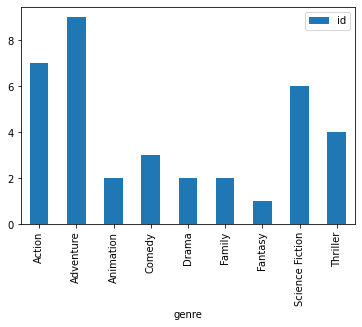

In [75]:
pop_movies = movies.query('id == 211672 or id == 157336 or id == 293660 or id == 118340 or id == 76341 or id == 135397 or id == 22 or id == 119450 or id == 131631 or id == 177572')

# Use right join to merge the movie_to_genres and pop_movies tables
genres_movies = movie_to_genres.merge(pop_movies, how='right', 
                                      left_on='movie_id', 
                                      right_on='id')

# Count the number of genres
genre_count = genres_movies.groupby('genre').agg({'id':'count'})

# Plot a bar chart of the genre_count
genre_count.plot(kind='bar')
plt.show()

### Using outer join to select actors
Instructions:
<ul>
<li>Save to iron_1_and_2 the merge of iron_1_actors (left) with iron_2_actors tables with an outer join on the id column, and set suffixes to ('_1','_2').</li>
<li>Create an index that returns True if name_1 or name_2 are null, and False otherwise.</li>
</ul>

In [138]:
iron_1_actors = casts.query('movie_id == 1726').drop(columns=["movie_id", "cast_id", "gender"])
iron_2_actors = casts.query('movie_id == 10138').drop(columns=["movie_id", "cast_id", "gender"])

# Merge iron_1_actors to iron_2_actors on id with outer join using suffixes
iron_1_and_2 = iron_1_actors.merge(iron_2_actors,
                                     on='id',
                                     how='outer',
                                     suffixes=['_1','_2'])

# Create an index that returns true if name_1 or name_2 are null
m = ((iron_1_and_2['name_1'].isna()) | 
     (iron_1_and_2['name_2'].isna()))

# Print the first few rows of iron_1_and_2
iron_1_and_2[m].head()

,character_1,id,name_1,character_2,name_2
0,Yinsen,17857,Shaun Toub,NaN,NaN
2,Obadiah Stane / Iron Monger,1229,Jeff Bridges,NaN,NaN
3,"Lt. Col. James ""Rhodey"" Rhodes / War Machine",18288,Terrence Howard,NaN,NaN
5,Raza,57452,Faran Tahir,NaN,NaN
8,Abu Bakaar,173810,Sayed Badreya,NaN,NaN


### Self join
Instructions:
<ul>
<li>To a variable called crews_self_merged, merge the crews table to itself on the id column using an inner join, setting the suffixes to '_dir' and '_crew' for the left and right tables respectively.</li>
<li>Create a Boolean index, named boolean_filter, that selects rows from the left table with the job of 'Director' and avoids rows with the job of 'Director' in the right table.</li>
<li>Use the .head() method to print the first few rows of direct_crews.</li>
</ul>

In [140]:
# Merge the crews table to itself
crews_self_merged = crews.merge(crews, on='id', how='inner',
                                suffixes=('_dir','_crew'))

# Create a boolean index to select the appropriate rows
boolean_filter = ((crews_self_merged['job_dir'] == 'Director') & 
                  (crews_self_merged['job_crew'] != 'Director'))
direct_crews = crews_self_merged[boolean_filter]

# Print the first few rows of direct_crews
direct_crews.head()

,id,department_dir,job_dir,name_dir,department_crew,job_crew,name_crew
156,19995,Directing,Director,James Cameron,Editing,Editor,Stephen E. Rivkin
157,19995,Directing,Director,James Cameron,Sound,Sound Designer,Christopher Boyes
158,19995,Directing,Director,James Cameron,Production,Casting,Mali Finn
160,19995,Directing,Director,James Cameron,Writing,Writer,James Cameron
161,19995,Directing,Director,James Cameron,Art,Set Designer,Richard F. Mays


### Index merge for movie ratings
Instructions:
<ul>
<li>Merge movies and ratings on the index and save to a variable called movies_ratings, ensuring that all of the rows from the movies table are returned.</li>
</ul>

In [141]:
# Merge to the movies table the ratings table on the index
movies_ratings = movies.merge(ratings, on='id')

# Print the first few rows of movies_ratings
movies_ratings.head()

,id,title,popularity,release_date,vote_average,vote_count
0,257,Oliver Twist,20.415572,2005-09-23,6.7,274.0
1,14290,Better Luck Tomorrow,3.877036,2002-01-12,6.5,27.0
2,38365,Grown Ups,38.864027,2010-06-24,6.0,1705.0
3,9672,Infamous,3.680896,2006-11-16,6.4,60.0
4,12819,Alpha and Omega,12.300789,2010-09-17,5.3,124.0


### Do sequels earn more?
Instructions:
<ul>
<li>With the sequels table on the left, merge to it the financials table on index named id, ensuring that all the rows from the sequels are returned and some rows from the other table may not be returned, Save the results to sequels_fin.</li>
<li>Merge the sequels_fin table to itself with an inner join, where the left and right tables merge on sequel and id respectively with suffixes equal to ('_org','_seq'), saving to orig_seq.</li>
<li>Select the title_org, title_seq, and diff columns of orig_seq and save this as titles_diff.</li>
<li>Sort by titles_diff by diff in descending order and print the first few rows.</li>
</ul>

In [174]:
# Merge sequels and financials on index id
sequels_fin = sequels.merge(financials, on='id', how='left')

# Self merge with suffixes as inner join with left on sequel and right on id
orig_seq = sequels_fin.merge(sequels_fin, how='inner', left_on='sequel', 
                             right_on='id', right_index=True,
                             suffixes=('_org','_seq'))

# Add calculation to subtract revenue_org from revenue_seq 
orig_seq['diff'] = orig_seq['revenue_seq'] - orig_seq['revenue_org']

# Select the title_org, title_seq, and diff 
titles_diff = orig_seq[['title_org','title_seq','diff']]

# Print the first rows of the sorted titles_diff
titles_diff.sort_values(by='diff', ascending=False).head()

,title_org,title_seq,diff
id,,,
331,Jurassic Park III,Jurassic World,1.144748e+09
272,Batman Begins,The Dark Knight,6.303398e+08
10138,Iron Man 2,Iron Man 3,5.915067e+08
863,Toy Story 2,Toy Story 3,5.696028e+08
10764,Quantum of Solace,Skyfall,5.224703e+08


## 3. Advanced Merging and Concatenating

### Performing an anti join
Instructions:
<ul>
<li>Merge employees and top_cust with a left join, setting indicator argument to True. Save the result to empl_cust.</li>
<li>Select the srid column of empl_cust and the rows where _merge is 'left_only'. Save the result to srid_list.</li>
<li>Subset the employees table and select those rows where the srid is in the variable srid_list and print the results.</li>
</ul>

In [ ]:
# Merge employees and top_cust
empl_cust = employees.merge(top_cust, on='srid', 
                                 how='left', indicator=True)

# Select the srid column where _merge is left_only
srid_list = empl_cust.loc[empl_cust['_merge'] == 'left_only', 'srid']

# Get employees not working with top customers
print(employees[employees['srid'].isin(srid_list)])

### Performing a semi join
Instructions:
<ul>
<li>Merge non_mus_tcks and top_invoices on tid using an inner join. Save the result as tracks_invoices.</li>
<li>Use .isin() to subset the rows of non_mus_tck where tid is in the tid column of tracks_invoices. Save the result as top_tracks.</li>
<li>Group top_tracks by gid and count the tid rows. Save the result to cnt_by_gid.</li>
<li>Merge cnt_by_gid with the genres table on gid and print the result.</li>
</ul>

In [ ]:
# Merge the non_mus_tck and top_invoices tables on tid
tracks_invoices = non_mus_tcks.merge(top_invoices, on='tid')

# Use .isin() to subset non_mus_tcks to rows with tid in tracks_invoices
top_tracks = non_mus_tcks[non_mus_tcks['tid'].isin(tracks_invoices['tid'])]

# Group the top_tracks by gid and count the tid rows
cnt_by_gid = top_tracks.groupby(['gid'], as_index=False).agg({'tid':'count'})

# Merge the genres table to cnt_by_gid on gid and print
print(cnt_by_gid.merge(genres, on='gid'))

### Concatenation basics
Instructions:
<ul>
<li>Concatenate tracks_master, tracks_ride, and tracks_st, in that order, setting sort to True.</li>
<li>Concatenate tracks_master, tracks_ride, and tracks_st, where the index goes from 0 to n-1.</li>
<li>Concatenate tracks_master, tracks_ride, and tracks_st, showing only columns that are in all tables.</li>
</ul>

In [ ]:
# Concatenate the tracks
tracks_from_albums = pd.concat([tracks_master, tracks_ride, tracks_st], sort=True)
print(tracks_from_albums)

# Concatenate the tracks so the index goes from 0 to n-1
tracks_from_albums = pd.concat([tracks_master, tracks_ride, tracks_st], ignore_index=True, sort=True)

print(tracks_from_albums)

# Concatenate the tracks, show only columns names that are in all tables
tracks_from_albums = pd.concat([tracks_master, tracks_ride, tracks_st], join='inner', sort=True)

print(tracks_from_albums)

### Concatenating with keys
Instructions:
<ul>
<li>Concatenate the three tables together vertically in order with the oldest month first, adding '7Jul', '8Aug', and '9Sep' as keys for their respective months, and save to variable avg_inv_by_month.</li>
<li>Use the .agg() method to find the average of the total column from the grouped invoices.</li>
<li>Create a bar chart of avg_inv_by_month.</li>
</ul>

In [ ]:
# Concatenate the tables and add keys
inv_jul_thr_sep = pd.concat([inv_jul, inv_aug, inv_sep], 
                            keys=['7Jul', '8Aug', '9Sep'])

# Group the invoices by the index keys and find avg of the total column
avg_inv_by_month = inv_jul_thr_sep.groupby(level=0).agg({'total':'mean'})

# Bar plot of avg_inv_by_month
avg_inv_by_month.plot(kind='bar')
plt.show()

### Using the append method
Instructions:
<ul>
<li>Use the .append() method to combine (in this order) tracks_ride, tracks_master, and tracks_st together vertically, and save to metallica_tracks.</li>
<li>Merge metallica_tracks and invoice_items on tid with an inner join, and save to tracks_invoices.</li>
<li>For each tid and name in tracks_invoices, sum the quantity sold column, and save as tracks_sold.</li>
<li>Sort tracks_sold in descending order by the quantity column, and print the table.</li>
</ul>

In [ ]:
# Use the .append() method to combine the tracks tables
metallica_tracks = tracks_ride.append([tracks_master, tracks_st], sort=False)

# Merge metallica_tracks and invoice_items
tracks_invoices = metallica_tracks.merge(invoice_items, on='tid')

# For each tid and name sum the quantity sold
tracks_sold = tracks_invoices.groupby(['tid','name']).agg({'quantity':'sum'})

# Sort in decending order by quantity and print the results
print(tracks_sold.sort_values(by='quantity', ascending=False))

### Concatenate and merge to find common songs
Instructions:
<ul>
<li>Concatenate the classic_18 and classic_19 tables vertically where the index goes from 0 to n-1, and save to classic_18_19.</li>
<li>Concatenate the pop_18 and pop_19 tables vertically where the index goes from 0 to n-1, and save to pop_18_19.</li>
<li>With classic_18_19 on the left, merge it with pop_18_19 on tid using an inner join.</li>
<li>Use .isin() to filter classic_18_19 where tid is in classic_pop.</li>
</ul>

In [ ]:
# Concatenate the classic tables vertically
classic_18_19 = pd.concat([classic_18, classic_19], ignore_index=True)

# Concatenate the pop tables vertically
pop_18_19 = pd.concat([pop_18, pop_19], ignore_index=True)

## 4. Merging Ordered and Time-Series Data

### Correlation between GDP and S&P500
Instructions:
<ul>
<li>Use merge_ordered() to merge gdp and sp500 using a left join on year and date. Save the results as gdp_sp500.</li>
<li>Print gdp_sp500 and look at the returns for the year 2018.</li>
<li>Use merge_ordered(), again similar to before, to merge gdp and sp500 use the function's ability to interpolate missing data to forward fill the missing value for returns, assigning this table to the variable gdp_sp500.</li>
<li>Subset the gdp_sp500 table, select the gdp and returns columns, and save as gdp_returns.</li>
<li>Print the correlation matrix of the gdp_returns table.</li>
</ul>

In [235]:
gdp = worldbank_gdp.drop(columns=['Country Name', "Indicator Name"])
gdp = gdp[gdp['Country Code'] == "USA"]
gdp.columns = gdp.columns.str.lower()
sp500.columns = sp500.columns.str.lower()

# Use merge_ordered() to merge gdp and sp500, interpolate missing value
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on='year', right_on='date', 
                             how='left',  fill_method='ffill')

# Subset the gdp and returns columns
gdp_returns = gdp_sp500[['gdp', 'returns']]

# Print gdp_returns correlation
gdp_returns.corr()

,gdp,returns
gdp,1.000000,0.212173
returns,0.212173,1.000000


### Phillips curve using merge_ordered()
Instructions:
<ul>
<li>Use merge_ordered() to merge the inflation and unemployment tables on date with an inner join, and save the results as inflation_unemploy.</li>
<li>Print the inflation_unemploy variable.</li>
<li>Using inflation_unemploy, create a scatter plot with unemployment_rate on the horizontal axis and cpi (inflation) on the vertical axis.</li>
</ul>

In [ ]:
# Use merge_ordered() to merge inflation, unemployment with inner join
inflation_unemploy = pd.merge_ordered(inflation, unemployment, on='date', how='inner')

# Print inflation_unemploy 
print(inflation_unemploy)

# Plot a scatter plot of unemployment_rate vs cpi of inflation_unemploy
inflation_unemploy.plot(kind='scatter', x='unemployment_rate', y='cpi')
plt.show()

### merge_ordered() caution, multiple columns
Instructions:
<ul>
<li>Use merge_ordered() on gdp and pop, merging on columns date and country with the fill feature, save to ctry_date.</li>
<li>Perform the same merge of gdp and pop, but join on country and date (reverse of step 1) with the fill feature, saving this as date_ctry.</li>
</ul>

In [ ]:
# Merge gdp and pop on date and country with fill and notice rows 2 and 3
ctry_date = pd.merge_ordered(gdp, pop, on=['date','country'], fill_method='ffill')

# Print ctry_date
print(ctry_date)

# Merge gdp and pop on country and date with fill
date_ctry = pd.merge_ordered(gdp, pop, on=['country','date'], fill_method='ffill')

# Print date_ctry
print(date_ctry)

### Using merge_asof() to study stocks
Instructions:
<ul>
<li>Use merge_asof() to merge jpm (left table) and wells together on the date_time column, where the rows with the nearest times are matched, and with suffixes=('', '_wells'). Save to jpm_wells.</li>
<li>Use merge_asof() to merge jpm_wells (left table) and bac together on the date_time column, where the rows with the closest times are matched, and with suffixes=('_jpm', '_bac'). Save to jpm_wells_bac.</li>
<li>Using price_diffs, create a line plot of the close price of JPM, WFC, and BAC only.</li>
</ul>

In [ ]:
# Use merge_asof() to merge jpm and wells
jpm_wells = pd.merge_asof(jpm, wells, on='date_time', suffixes=('','_wells'), direction='nearest')


# Use merge_asof() to merge jpm_wells and bac
jpm_wells_bac = pd.merge_asof(jpm_wells, bac, on='date_time', suffixes=('_jpm','_bac'), direction='nearest')


# Compute price diff
price_diffs = jpm_wells_bac.diff()

# Plot the price diff of the close of jpm, wells and bac only
price_diffs.plot(y=['close_jpm', 'close_wells', 'close_bac'])
plt.show()

### Using merge_asof() to create dataset
Instructions:
<ul>
<li>Using merge_asof(), merge gdp and recession on date, with gdp as the left table. Save to the variable gdp_recession.</li>
<li>Create a list using a list comprehension and a conditional expression, named is_recession, where for each row if the gdp_recession['econ_status'] value is equal to 'recession' then enter 'r' else 'g'.</li>
<li>Using gdp_recession, plot a bar chart of gdp versus date, setting the color argument equal to is_recession.</li>
</ul>

In [ ]:
# Merge gdp and recession on date using merge_asof()
gdp_recession = pd.merge_asof(gdp, recession, on='date')

# Create a list based on the row value of gdp_recession['econ_status']
is_recession = ['r' if s=='recession' else 'g' for s in gdp_recession['econ_status']]

# Plot a bar chart of gdp_recession
gdp_recession.plot(kind='bar', y='gdp', x='date', color=is_recession, rot=90)
plt.show()

### Subsetting rows with .query()
Instructions:
<ul>
<li>Use merge_ordered() on gdp and pop on columns country and date with the fill feature, save to gdp_pop and print.</li>
<li>Add a column named gdp_per_capita to gdp_pop that divides gdp by pop.</li>
<li>Pivot gdp_pop so values='gdp_per_capita', index='date', and columns='country', save as gdp_pivot.</li>
<li>Use .query() to select rows from gdp_pivot where date is greater than equal to "1991-01-01". Save as recent_gdp_pop.</li>
</ul>

In [ ]:
# Merge gdp and pop on date and country with fill
gdp_pop = pd.merge_ordered(gdp, pop, on=['country','date'], fill_method='ffill')

# Add a column named gdp_per_capita to gdp_pop that divides the gdp by pop
gdp_pop['gdp_per_capita'] = gdp_pop['gdp'] / gdp_pop['pop']

# Pivot data so gdp_per_capita, where index is date and columns is country
gdp_pivot = gdp_pop.pivot_table('gdp_per_capita', 'date', 'country')

# Select dates equal to or greater than 1991-01-01
recent_gdp_pop = gdp_pivot.query('date >= "1991-01-01"')

# Plot recent_gdp_pop
recent_gdp_pop.plot(rot=90)
plt.show()

### Using .melt() to reshape government data
Instructions:
<ul>
<li>Use .melt() to unpivot all of the columns of ur_wide except year and ensure that the columns with the months and values are named month and unempl_rate, respectively. Save the result as ur_tall.</li>
<li>Add a column to ur_tall named date which combines the year and month columns as year-month format into a larger string, and converts it to a date data type.</li>
<li>Sort ur_tall by date and save as ur_sorted.</li>
<li>Using ur_sorted, plot unempl_rate on the y-axis and date on the x-axis.</li>
</ul>

In [ ]:
# unpivot everything besides the year column
ur_tall = ur_wide.melt(id_vars=['year'], var_name='month', value_name='unempl_rate')


# Create a date column using the month and year columns of ur_tall
ur_tall['date'] = pd.to_datetime(ur_tall['year'] + '-' + ur_tall['month'])

# Sort ur_tall by date in ascending order
ur_sorted = ur_tall.sort_values(by='date')

# Plot the unempl_rate by date
ur_sorted.plot(y='unempl_rate', x='date')
plt.show()

### Using .melt() for stocks vs bond performance
Instructions:
<ul>
<li>Use .melt() on ten_yr to unpivot everything except the metric column, setting var_name='date' and value_name='close'. Save the result to bond_perc.</li>
<li>Using the .query() method, select only those rows were metric equals 'close', and save to bond_perc_close.</li>
<li>Use merge_ordered() to merge dji (left table) and bond_perc_close on date with an inner join, and set suffixes equal to ('_dow', '_bond'). Save the result to dow_bond.</li>
<li>Using dow_bond, plot only the Dow and bond values.</li>
</ul>

In [ ]:
# Use melt on ten_yr, unpivot everything besides the metric column
bond_perc = ten_yr.melt(id_vars=['metric'], var_name='date', value_name='close')

# Use query on bond_perc to select only the rows where metric=close
bond_perc_close = bond_perc.query('metric == "close"')

# Merge (ordered) dji and bond_perc_close on date with an inner join
dow_bond = pd.merge_ordered(dji, bond_perc_close, on='date', how='inner', suffixes=['_dow','_bond'])


# Plot only the close_dow and close_bond columns
dow_bond.plot(y=['close_dow', 'close_bond'], x='date', rot=90)
plt.show()